In [2]:
import pandas as pd

In [ ]:
train_path = "data/train.txt"
val_path = "data/val.txt"
test_path = "data/test.txt"

In [ ]:
def load_data(path):
    df = pd.read_csv(path, sep=';', names=['text', 'label'])
    return df

In [ ]:
train_df = load_data(train_path)
val_df = load_data(val_path)
test_df = load_data(test_path)

In [ ]:
print("Train shape:", train_df.shape)
print("Val shape:", val_df.shape)
print("Test shape:", test_df.shape)

print("\nSample data:")
print(train_df.head())

Train shape: (16000, 2)
Val shape: (2000, 2)
Test shape: (2000, 2)

Sample data:
                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [11]:
train_df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [12]:
train_df.describe()

,text,label
count,16000,16000
unique,15969,6
top,i feel on the verge of tears from weariness i ...,joy
freq,2,5362


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [ ]:
import pandas as pd
import os

DATA_DIR = r"C:\Users\Domain\OneDrive\Desktop\depi grad proj\data"  

# قراءة الملفات الثلاثة بنفس التنسيق
train_df = pd.read_csv(os.path.join(DATA_DIR, "train.txt"), sep=';', names=['text','label'])
val_df   = pd.read_csv(os.path.join(DATA_DIR, "val.txt"),   sep=';', names=['text','label'])
test_df  = pd.read_csv(os.path.join(DATA_DIR, "test.txt"),  sep=';', names=['text','label'])

# دمجهم في DataFrame واحد
df = pd.concat([train_df, val_df, test_df]).reset_index(drop=True)

print("✅ عدد العيّنات الكلي:", len(df))
print("\n📋 أول 5 أسطر:")
print(df.head())

print("\n📊 توزيع الفئات:")
print(df['label'].value_counts())


✅ عدد العيّنات الكلي: 20000

📋 أول 5 أسطر:
                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

📊 توزيع الفئات:
label
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64


In [17]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Domain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Domain/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Domain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

print("✅ تم تنظيف النصوص!")
print(df[['text', 'clean_text']].head())


✅ تم تنظيف النصوص!
                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                          clean_text  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy wrong  
3  ever feeling nostalgic fireplace know still pr...  
4                                    feeling grouchy  


In [19]:
# ==============================
# 🔹 استيراد المكتبات الإضافية
# ==============================
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# تحميل بيانات إضافية من NLTK (مرة واحدة فقط)
nltk.download('wordnet')
nltk.download('omw-1.4')

# ==============================
# 🔹 إنشاء كائن Lemmatizer
# ==============================
lemmatizer = WordNetLemmatizer()

# ==============================
# 🔹 تحديث دالة التنظيف
# ==============================
def clean_text(text):
    text = text.lower()                                # تحويل لحروف صغيرة
    text = re.sub(r'[^a-z\s]', '', text)               # إزالة الرموز والأرقام
    tokens = word_tokenize(text)                       # تقسيم النص
    tokens = [w for w in tokens if w not in stop_words]# حذف stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens] # تطبيق Lemmatization
    return " ".join(tokens)

# ==============================
# 🔹 تطبيق التنظيف الجديد
# ==============================
df['clean_text'] = df['text'].apply(clean_text)

print("✅ تم تطبيق Lemmatization بنجاح!")
print(df[['text', 'clean_text']].head())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Domain/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Domain/nltk_data...


✅ تم تطبيق Lemmatization بنجاح!
                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                          clean_text  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy wrong  
3  ever feeling nostalgic fireplace know still pr...  
4                                    feeling grouchy  


In [20]:
# ==============================
# 1️⃣ استيراد المكتبات المطلوبة
# ==============================
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ==============================
# 2️⃣ تحويل النصوص إلى أرقام
# ==============================
# إنشاء كائن TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # نحدد أقصى عدد خصائص (اختياري)

# تدريب وتحويل النصوص
X = tfidf.fit_transform(df['clean_text'])

# ==============================
# 3️⃣ تحويل التصنيفات إلى أرقام
# ==============================
le = LabelEncoder()
y = le.fit_transform(df['label'])

# ==============================
# 4️⃣ تقسيم البيانات (تدريب واختبار)
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ حجم بيانات التدريب:", X_train.shape)
print("✅ حجم بيانات الاختبار:", X_test.shape)
print("\n📊 التصنيفات:", list(le.classes_))


✅ حجم بيانات التدريب: (16000, 5000)
✅ حجم بيانات الاختبار: (4000, 5000)

📊 التصنيفات: ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
...


Ellipsis

✅ دقة الموديل: 0.87825

📊 تقرير الأداء:
              precision    recall  f1-score   support

       anger       0.90      0.81      0.85       542
        fear       0.87      0.79      0.83       475
         joy       0.86      0.97      0.91      1352
        love       0.88      0.68      0.77       328
     sadness       0.90      0.94      0.92      1159
    surprise       0.86      0.55      0.67       144

    accuracy                           0.88      4000
   macro avg       0.88      0.79      0.82      4000
weighted avg       0.88      0.88      0.87      4000



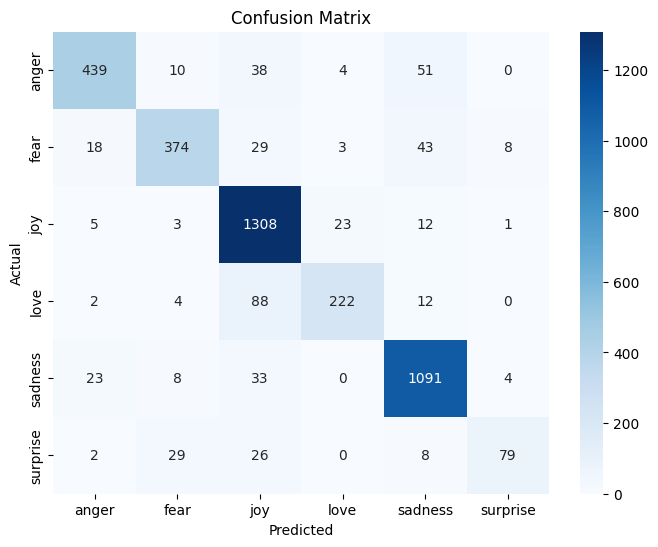

In [23]:
# ==============================
# 1️⃣ استيراد المكتبات
# ==============================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ==============================
# 2️⃣ تدريب الموديل
# ==============================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ==============================
# 3️⃣ التقييم على بيانات الاختبار
# ==============================
y_pred = model.predict(X_test)

print("✅ دقة الموديل:", accuracy_score(y_test, y_pred))

print("\n📊 تقرير الأداء:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ==============================
# 4️⃣ مصفوفة الارتباك
# ==============================
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\Domain\AppData\Local\Temp\ipykernel_11948\1014737756.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], order=df['label'].value_counts().index, palette='viridis')
c:\Users\Domain\OneDrive\Desktop\depi grad proj\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


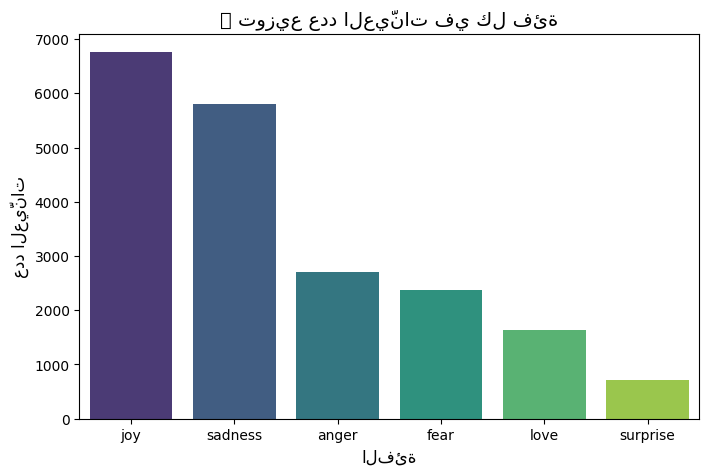

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x=df['label'], order=df['label'].value_counts().index, palette='viridis')

plt.title("📊 توزيع عدد العيّنات في كل فئة", fontsize=14)
plt.xlabel("الفئة", fontsize=12)
plt.ylabel("عدد العيّنات", fontsize=12)
plt.show()


In [26]:
# ==============================
# 1️⃣ استيراد الأدوات
# ==============================
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# ==============================
# 2️⃣ توازن الداتا
# ==============================
print("📊 قبل الموازنة:", Counter(y_train))

# إنشاء الكائن
ros = RandomOverSampler(random_state=42)

# تطبيق oversampling
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print("✅ بعد الموازنة:", Counter(y_resampled))
print(f"\n💪 حجم البيانات بعد الموازنة: {X_resampled.shape}")

# ==============================
# 3️⃣ إعادة تدريب الموديل
# ==============================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=2000)
model.fit(X_resampled, y_resampled)

# التقييم
y_pred = model.predict(X_test)

print(f"\n✅ دقة الموديل بعد الموازنة: {accuracy_score(y_test, y_pred):.4f}")
print("\n📊 تقرير الأداء:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


📊 قبل الموازنة: Counter({np.int64(2): 5409, np.int64(4): 4638, np.int64(0): 2167, np.int64(1): 1898, np.int64(3): 1313, np.int64(5): 575})
✅ بعد الموازنة: Counter({np.int64(1): 5409, np.int64(2): 5409, np.int64(4): 5409, np.int64(3): 5409, np.int64(0): 5409, np.int64(5): 5409})

💪 حجم البيانات بعد الموازنة: (32454, 5000)

✅ دقة الموديل بعد الموازنة: 0.8892

📊 تقرير الأداء:
              precision    recall  f1-score   support

       anger       0.86      0.87      0.87       542
        fear       0.85      0.82      0.84       475
         joy       0.94      0.90      0.92      1352
        love       0.74      0.92      0.82       328
     sadness       0.95      0.90      0.93      1159
    surprise       0.68      0.84      0.75       144

    accuracy                           0.89      4000
   macro avg       0.84      0.88      0.85      4000
weighted avg       0.90      0.89      0.89      4000



In [29]:
import joblib

# حفظ الموديل والمعالجين
joblib.dump(model, "emotion_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("✅ تم حفظ الموديل والمعالج بنجاح!")


✅ تم حفظ الموديل والمعالج بنجاح!


In [37]:
# خريطة التصنيفات حسب ترتيبك
label_map = {
    0: "anger",
    1: "fear",
    2: "joy",
    3: "love",
    4: "sadness",
    5: "surprise"
}

# جملة للتجربة
sample = "I feel really happy and optimistic today!"
prediction = model.predict(tfidf.transform([sample]))[0]
print("🎯 Emotion:", label_map[int(prediction)])


🎯 Emotion: joy


In [38]:
import joblib

# تحميل الموديل والمعالج
model = joblib.load("emotion_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")

def predict_emotion(text):
    X = tfidf.transform([text])
    prediction = model.predict(X)[0]
    return prediction

# تجربة
sample = "I feel really happy and optimistic today!"
print("🎯 Emotion:", predict_emotion(sample))


🎯 Emotion: 2


In [36]:
while True:
    text = input("اكتب جملة (أو 'exit' للخروج): ")
    if text.lower() == "exit":
        break
    print("🎯 المشاعر المتوقعة:", predict_emotion(text))


🎯 المشاعر المتوقعة: 3


In [42]:
# خريطة التصنيفات حسب ترتيبك
label_map = {
    0: "anger",
    1: "fear",
    2: "joy",
    3: "love",
    4: "sadness",
    5: "surprise"
}

# جملة للتجربة
sample = "I feel really sad !"
prediction = model.predict(tfidf.transform([sample]))[0]
print("🎯 Emotion:", label_map[int(prediction)])


🎯 Emotion: sadness
